# Spherical Gaussian experiment: inference results

## Setup

In [1]:
import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
import logging

sys.path.append("../../")

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Load results

In [2]:
algo_filenames = ["flow", "pie", "mf"]
algo_labels = ["Standard flow", "PIE", "Manifold flow"]

setup_filenames = [
    "8_9_0.010",
    "8_9_0.001",
    "8_9_0.100",
    "8_12_0.010",
    "8_16_0.010",
]


In [5]:
result_dir = "../data/results"

true_posterior_samples = []
model_posterior_samples = []
mmds = []

for algo_filename in algo_filenames:
    true_posterior_samples_ = []
    model_posterior_samples_ = []
    mmds_ = []
    for setup_filename in setup_filenames:
        try:
            true_posterior_samples_.append(np.load(
                "{}/{}_8_conditional_spherical_gaussian_{}_true_posterior_samples.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except FileNotFoundError as e:
            print(e)
            true_posterior_samples_.append(np.nan*np.ones((1000,2)))
            
        try:
            model_posterior_samples_.append(np.load(
                "{}/{}_8_conditional_spherical_gaussian_{}_model_posterior_samples.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except FileNotFoundError as e:
            print(e)
            model_posterior_samples_.append(np.nan*np.ones((1000,2)))
            
        try:
            mmds_.append(np.load(
                "{}/{}_8_conditional_spherical_gaussian_{}_mmd.npy".format(
                    result_dir, algo_filename, setup_filename
                )
            ))
        except:
            mmds_.append(np.nan*np.ones((1,)))
            
    true_posterior_samples.append(true_posterior_samples_)
    model_posterior_samples.append(model_posterior_samples_)
    mmds.append(mmds_)
    
true_posterior_samples = np.asarray(true_posterior_samples)
model_posterior_samples = np.asarray(model_posterior_samples)
mmds = np.asarray(mmds)


[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_9_0.010_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_9_0.010_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_9_0.001_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_9_0.001_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_9_0.100_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_9_0.100_model_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_12_0.010_true_posterior_samples.npy'
[Errno 2] No such file or directory: '../data/results/mf_8_conditional_spherical_gaussian_8_12_0.010

## Plot results

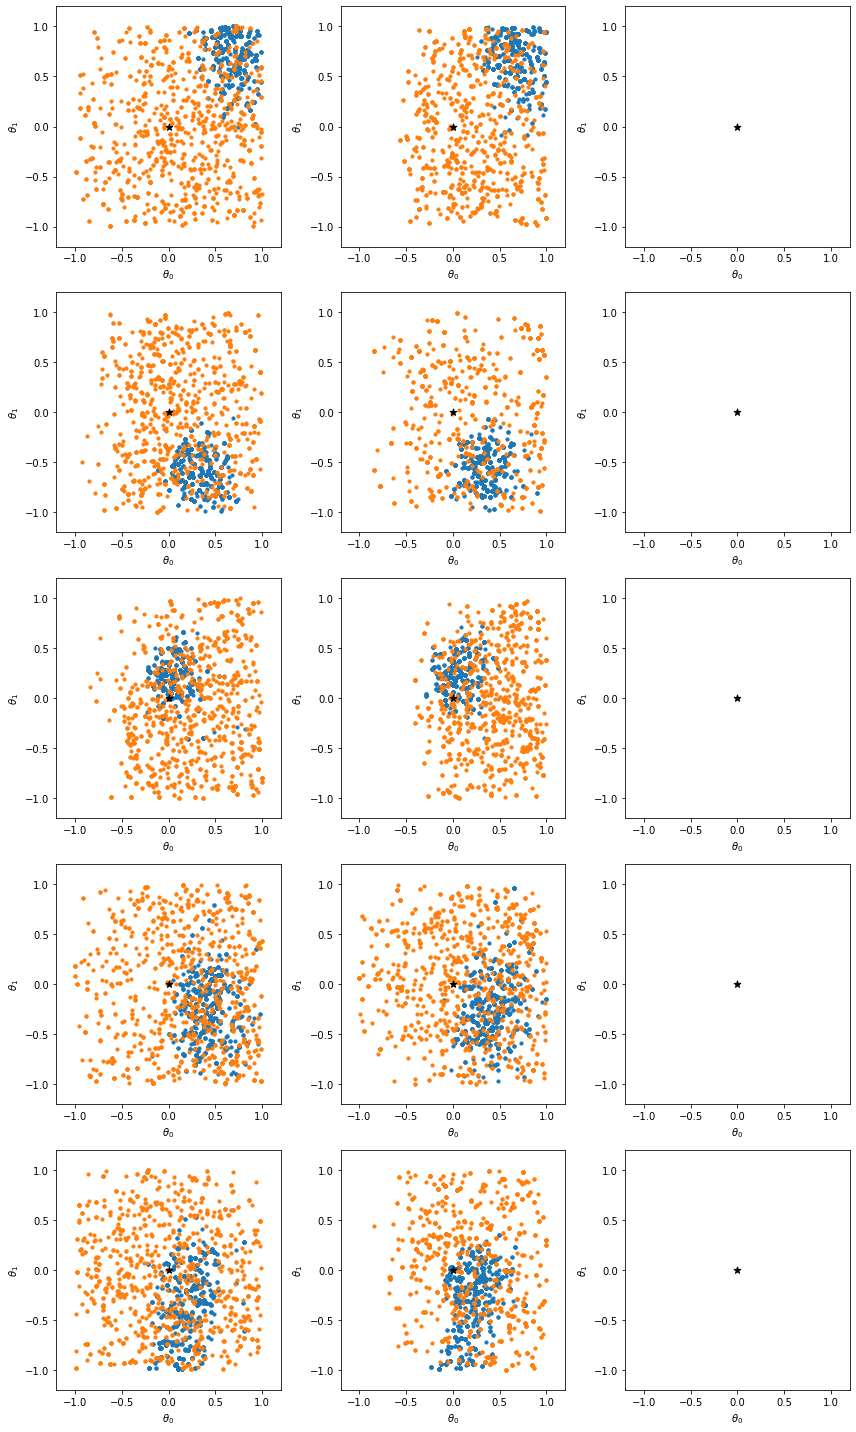

In [13]:
show = [0,1,2,3,4]
ncols = 3
nrows = len(show)

fig = plt.figure(figsize=(ncols*4, nrows*4))

for row, setting in enumerate(show):
    for col, algo in enumerate(range(3)):
        ax = plt.subplot(nrows, ncols, setting*ncols + algo + 1)

        plt.scatter(true_posterior_samples[algo, setting,:,0], true_posterior_samples[algo, setting,:,1], s=10., c="C0")
        plt.scatter(model_posterior_samples[algo, setting,:,0], model_posterior_samples[algo, setting,:,1], s=10., c="C1")
        plt.scatter([0.], [0.], s=50, marker="*", c="black")

        plt.xlabel(r"$\theta_0$")
        plt.ylabel(r"$\theta_1$")
        plt.xlim(-1.2,1.2)
        plt.ylim(-1.2,1.2)
    
plt.tight_layout()
plt.savefig("../figures/posterior_samples_csg.pdf")


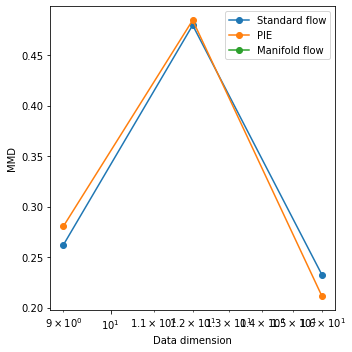

In [15]:
show = [3, 0, 4]
xs = [9, 12, 16]

fig = plt.figure(figsize=(5,5))

ax = plt.subplot(1,1,1)
for mmds_, algo_label in zip(mmds, algo_labels):
    plt.plot(xs, mmds_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.xlabel("Data dimension")
plt.ylabel("MMD")

plt.tight_layout()
plt.savefig("../figures/mmd_vs_dim_csg.pdf")


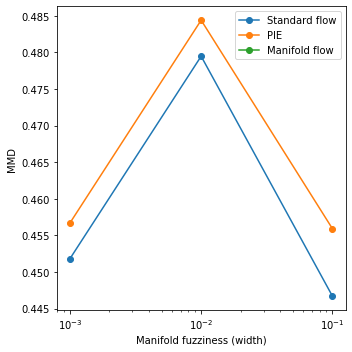

In [14]:
show = [1, 0, 2]
xs = [0.001, 0.01, 0.1]

fig = plt.figure(figsize=(5,5))

for mmds_, algo_label in zip(mmds, algo_labels):
    plt.plot(xs, mmds_[show], label=algo_label, ls="-", marker="o", ms=6.)
plt.legend()
plt.xscale("log")
plt.xlabel("Manifold fuzziness (width)")
plt.ylabel("MMD")

plt.tight_layout()
plt.savefig("../figures/mmd_vs_epsilon_csg.pdf")

